In [1]:
!pip install matplotlib kagglehub kaggle -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 48.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 9.6 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=ae8cb0147bf79fee459348bc08036d8a99b6d86ac4587899df5e590d878da6b1
  Stored in directory: /root/.cache/pip/wheels/ff/55/fb/b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.1
    Uninstalling matplotlib-3.9.1:
      Successfully uninstalled matplotlib-3.9.1

[notice] A new release o

In [2]:
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
import kagglehub
from tensorflow import data
from keras import layers, optimizers, losses, utils, Sequential, metrics, models, regularizers, callbacks, applications
import numpy as np
import gc
import keras.backend as K

2024-12-10 09:55:54.087255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 09:55:54.178990: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 09:55:54.205188: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 09:55:54.370684: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            # Set memory growth to True to allocate memory as needed
            tf.config.experimental.set_memory_growth(gpu, True)

        # Optionally, limit the total GPU memory allocation
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=10240)]  # 10GB limit
        )
    except RuntimeError as e:
        print(e)

I0000 00:00:1733824570.066115      23 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733824570.122833      23 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733824570.122876      23 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.


In [4]:
# Download latest version
data_root = kagglehub.dataset_download("puneet6060/intel-image-classification")

data_root, Path(data_root)

100%|████████████████████████████████████████████████████████████████████████████████| 346M/346M [00:20<00:00, 18.0MB/s]

Extracting files...


('/root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2',
 PosixPath('/root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2'))

In [5]:
img_size=150
batch_size=32

In [6]:
data_root = Path(data_root)
train_data_path = Path('seg_train')
test_data_path = Path('seg_test')
pred_data_path = Path('seg_pred')

train_ds = utils.image_dataset_from_directory(
    data_root / train_data_path / train_data_path,
    image_size=(img_size,img_size),
    validation_split=.2,
    subset='both',
    seed=55,
    batch_size=batch_size
)

test_ds = utils.image_dataset_from_directory(
    directory=data_root/test_data_path/test_data_path,
    image_size=(img_size,img_size),
    batch_size=batch_size
)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Using 2806 files for validation.


I0000 00:00:1733824623.961166      23 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733824623.961251      23 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733824623.961274      23 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733824624.223481      23 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-10 09:57:04.223514: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2112] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.

Found 3000 files belonging to 6 classes.


In [7]:
train_data, val_data = train_ds

train_data, val_data, test_ds

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [8]:
class_names = train_data.class_names

class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

2024-12-10 09:57:25.988331: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


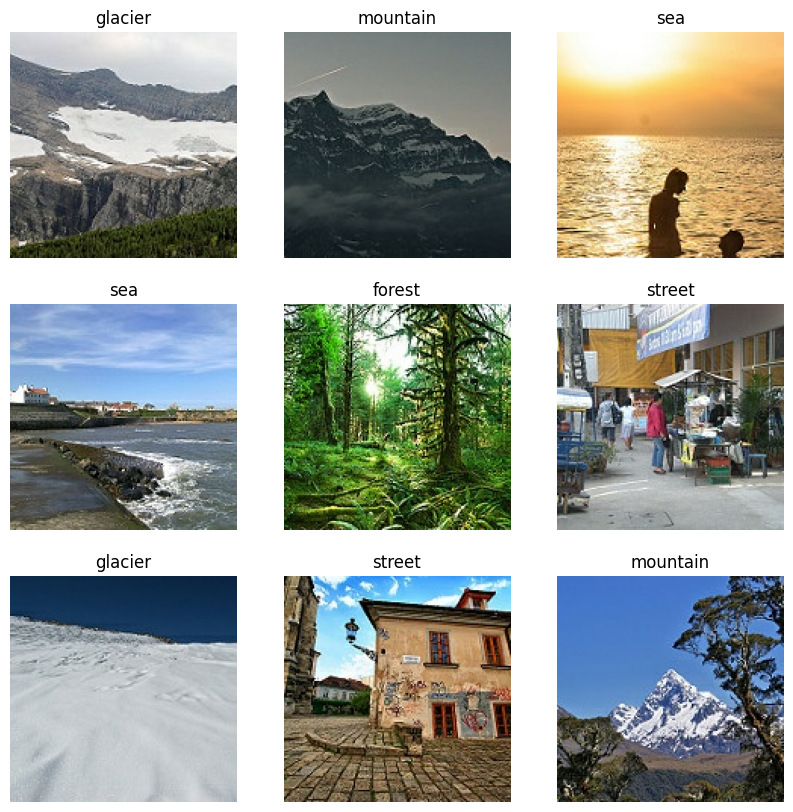

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
t_img_batch, t_lbl_batch = next(iter(train_data))
v_img_batch, v_lbl_batch = next(iter(val_data))
te_img_batch, te_lbl_batch = next(iter(test_ds))

t_img_batch.shape, t_lbl_batch.shape, v_img_batch.shape, v_lbl_batch.shape, te_img_batch.shape, te_lbl_batch.shape

(TensorShape([32, 150, 150, 3]),
 TensorShape([32]),
 TensorShape([32, 150, 150, 3]),
 TensorShape([32]),
 TensorShape([32, 150, 150, 3]),
 TensorShape([32]))

In [11]:
norm_max = np.max(t_img_batch)
norm_max

255.0

In [12]:
Rescale = layers.Rescaling(scale=norm_max ** -1)
train_data_rescaled = train_data.map(lambda img, lbl: (Rescale(img), lbl))
val_data_rescaled = val_data.map(lambda img, lbl: (Rescale(img), lbl))
test_data_rescaled = test_ds.map(lambda img, lbl: (Rescale(img), lbl))

In [13]:
v_img_batch_re, v_lbl_batch_re = next(iter(val_data_rescaled))

np.max(v_img_batch_re)

1.0

In [14]:
train_data_processed = (
    train_data_rescaled
    .cache()
    .shuffle(1000)
    .prefetch(data.AUTOTUNE)
)

val_data_processed = (
    val_data_rescaled
    .cache()
    .shuffle(1000)
    .prefetch(data.AUTOTUNE)
)

test_data_processed = (
    test_data_rescaled
    .cache()
    # .shuffle(1000)
    .prefetch(data.AUTOTUNE)
)

In [15]:
dataset = dict(
    train = train_data_processed,
    validate = val_data_processed,
    test = test_data_processed
)

In [16]:
inception_model = applications.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(img_size,img_size,3),
    pooling='max'
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [17]:
inception_model.trainable=False

inception_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [18]:
IConvNet = Sequential(layers=[
    layers.Input(shape=(img_size, img_size, 3)),
    inception_model,
    layers.Dropout(rate=.3),
    layers.Dense(units=1024),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(rate=.3),
    layers.Dense(units=256),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(rate=.3),
    layers.Dense(units=32),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(rate=.1),
    layers.Dense(units=len(class_names))
])

IConvNet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 2048)           │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_95          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,177,030 (92.23 MB)

 Trainable params: 2,371,622 (9.05 MB)

 Non-trainable params: 21,805,408 (83.18 MB)

In [19]:
epochs = 5
learning_rate=1e-3
decay_steps = epochs
decay_rate = 0.96
batch_size=32

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True
)

IConvNet.compile(
    optimizer=optimizers.AdamW(learning_rate=lr_schedule),
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
    run_eagerly=True
)

early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True
)

In [20]:
IConvNet.fit(
    dataset['train'],
    validation_data=dataset['validate'],
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping])

Epoch 1/5


2024-12-10 09:58:03.237235: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906
W0000 00:00:1733824683.412718      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824683.547882      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824683.555710      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824683.563618      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824683.577632      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824683.594375      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824683.605668      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824683.613534      23 gpu_t

308/351 ━━━━━━━━━━━━━━━━━━━━ 19s 448ms/step - accuracy: 0.7244 - loss: 0.7995

W0000 00:00:1733824825.636067      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824825.637209      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824825.638246      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824825.639312      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824825.640341      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824825.641474      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824825.642619      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824825.643724      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824825.644841      23 gp

309/351 ━━━━━━━━━━━━━━━━━━━━ 19s 453ms/step - accuracy: 0.7246 - loss: 0.7989

W0000 00:00:1733824827.493133      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824827.496506      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824827.497967      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824827.499443      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824827.500996      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824827.502651      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824827.504098      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824827.505725      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824827.507279      23 gp

351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.7339 - loss: 0.7750

2024-12-10 10:00:45.137437: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 8640256 bytes after encountering the first element of size 8640256 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
W0000 00:00:1733824851.674515      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824851.676106      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824851.677373      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824851.678698      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824851.679971      23 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733824851.682040      23 gpu_timer.cc:114] Skip

351/351 ━━━━━━━━━━━━━━━━━━━━ 184s 495ms/step - accuracy: 0.7342 - loss: 0.7745 - val_accuracy: 0.8828 - val_loss: 0.3701
Epoch 2/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 163s 465ms/step - accuracy: 0.8603 - loss: 0.4513 - val_accuracy: 0.8835 - val_loss: 0.3589
Epoch 3/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 162s 461ms/step - accuracy: 0.8676 - loss: 0.4259 - val_accuracy: 0.8831 - val_loss: 0.3594
Epoch 4/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 177s 504ms/step - accuracy: 0.8577 - loss: 0.4443 - val_accuracy: 0.8845 - val_loss: 0.3579
Epoch 5/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 223s 636ms/step - accuracy: 0.8656 - loss: 0.4343 - val_accuracy: 0.8849 - val_loss: 0.3577


In [22]:
!ls

main.ipynb  models


In [23]:
models_dir = Path('./models')
models_dir.mkdir(exist_ok=True)

iteration=1
model_path = f'V{iteration}.keras'



In [24]:
IConvNet.save(models_dir/model_path)

In [20]:
from numba import cuda

cuda.select_device(0)
cuda.close()

In [22]:
K.clear_session()
gc.collect()

0

In [19]:
IConvNet_Saved = models.load_model(models_dir/model_path)

IConvNet_Saved.evaluate(
    dataset['test'],
    batch_size=32,
)

I0000 00:00:1733773881.544638   28607 cuda_dnn.cc:529] Loaded cuDNN version 90300


94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 208ms/step - accuracy: 0.8913 - loss: 0.3425


[0.35030412673950195, 0.8856666684150696]